In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df_resnet = pd.read_csv('RESNET50/log.csv')
df_mobilenet = pd.read_csv('Mobilenet/log.csv')

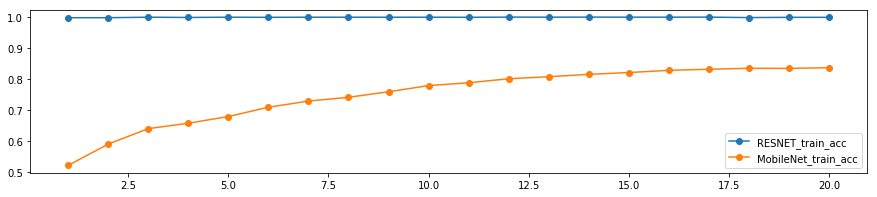

In [25]:
plt.figure(figsize=(15,3))
plt.plot(df_resnet['epoch'], df_resnet['acc'], label = 'RESNET_train_acc', marker='o')
plt.plot(df_resnet['epoch'], df_mobilenet['acc'], label = 'MobileNet_train_acc', marker='o')
plt.legend()

"""
Observation:

ResNet train accuracy by far exceeds MobileNet train accuracy. Although further improvement after more training is stagnant
in ResNet but improving in MobileNet

"""



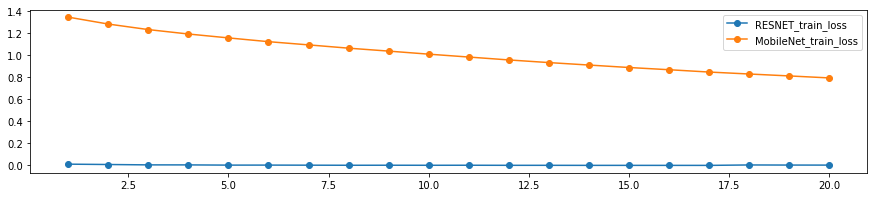

In [26]:
plt.figure(figsize=(15,3))
plt.plot(df_resnet['epoch'], df_resnet['loss'], label = 'RESNET_train_loss', marker='o')
plt.plot(df_resnet['epoch'], df_mobilenet['loss'], label = 'MobileNet_train_loss', marker='o')
plt.legend()

"""
Observation:

ResNet train loss is by far less than MobileNet train loss

"""

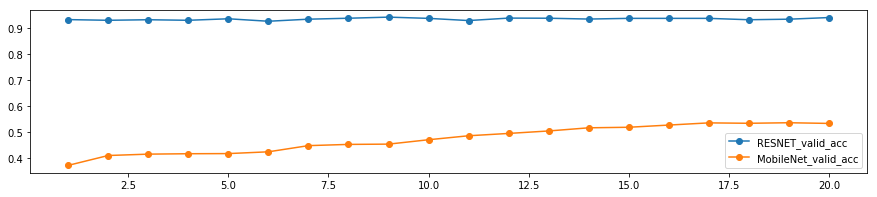

In [27]:
plt.figure(figsize=(15,3))
plt.plot(df_resnet['epoch'], df_resnet['val_acc'], label = 'RESNET_valid_acc', marker='o')
plt.plot(df_resnet['epoch'], df_mobilenet['val_acc'], label = 'MobileNet_valid_acc', marker='o')
plt.legend()

"""
Observation:

ResNet validation accuracy by far exceeds MobileNet validation accuracy

"""

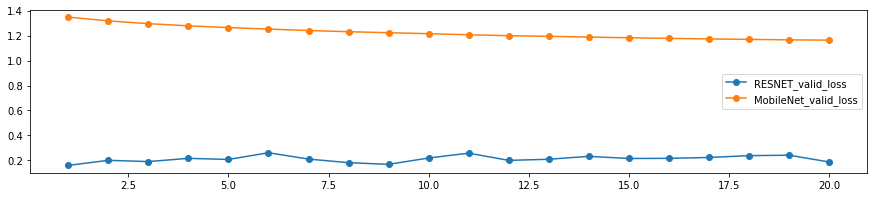

In [29]:
plt.figure(figsize=(15,3))
plt.plot(df_resnet['epoch'], df_resnet['val_loss'], label = 'RESNET_valid_loss', marker='o')
plt.plot(df_resnet['epoch'], df_mobilenet['val_loss'], label = 'MobileNet_valid_loss', marker='o')
plt.legend()

"""
Observation:

ResNet validation loss is by far less than MobileNet validation loss

"""

In [51]:
# Compute Confusion matrix for RESNET50

import argparse
import time
import tensorflow as tf
import os
import cv2
import numpy as np
from RESNET50 import create_model as cm
from tqdm import tqdm

classes = ['chairs', 'curtains','sofas','wardrobes']

actual_labels = []
prediction_labels = []

model = cm.create_model('RESNET50/ckpt/weights_04_0.17.hdf5')


def inference(path, model):
    global actual_labels, prediction_labels
    class_name = path.split('/')[-1]

    t1 = time.time()
    counter = 0
    for files in tqdm(os.listdir(path)):
        img = cv2.imread(os.path.join(path, files))
        img = cv2.resize(img, (224,224))
        img = np.expand_dims(img, 0)
        prediction = model.predict(img)
        prediction_label = np.argmax(prediction)
        actual_labels.append(classes.index(class_name))
        prediction_labels.append(prediction_label)
#         print(files, prediction_label)
        counter += 1

    t2 = time.time()
    print('Average prediction time:', (t2-t1)/counter)
    
path_list = ['dataset/augmented/validation/chairs', 'dataset/augmented/validation/curtains', 
             'dataset/augmented/validation/sofas', 'dataset/augmented/validation/wardrobes']

for path in path_list:
    inference(path, model)
    
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(actual_labels, prediction_labels) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual_labels, prediction_labels)) 
print('Report : ')
print(classification_report(actual_labels, prediction_labels)) 

Exists: True
Pretrained weights loaded from ckpt
Custom resnet model created


  0%|          | 0/208 [00:00<?, ?it/s]

Average prediction time: 0.3794797758261363


  0%|          | 0/634 [00:00<?, ?it/s]

Average prediction time: 0.46634333064922917


  0%|          | 0/410 [00:00<?, ?it/s]

Average prediction time: 0.4858381293173468


100%|██████████| 410/410 [02:24<00:00,  2.79it/s]

Average prediction time: 0.351709246635437
Confusion Matrix :
[[577   5  63   3]
 [  0 205   0   3]
 [  0   3 631   0]
 [  0  51   0 359]]
Accuracy Score : 0.9326315789473684
Report : 
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       648
           1       0.78      0.99      0.87       208
           2       0.91      1.00      0.95       634
           3       0.98      0.88      0.93       410

   micro avg       0.93      0.93      0.93      1900
   macro avg       0.92      0.94      0.92      1900
weighted avg       0.94      0.93      0.93      1900



In [52]:
# Compute Confusion matrix for Mobilenet

import argparse
import time
import tensorflow as tf
import os
import cv2
import numpy as np
from RESNET50 import create_model as cm
from tqdm import tqdm

classes = ['chairs', 'curtains','sofas','wardrobes']

actual_labels = []
prediction_labels = []

model = cm.create_model('Mobilenet/ckpt/weights_09_1.17.hdf5')


def inference(path, model):
    global actual_labels, prediction_labels
    class_name = path.split('/')[-1]

    t1 = time.time()
    counter = 0
    for files in tqdm(os.listdir(path)):
        img = cv2.imread(os.path.join(path, files))
        img = cv2.resize(img, (224,224))
        img = np.expand_dims(img, 0)
        prediction = model.predict(img)
        prediction_label = np.argmax(prediction)
        actual_labels.append(classes.index(class_name))
        prediction_labels.append(prediction_label)
#         print(files, prediction_label)
        counter += 1

    t2 = time.time()
    print('Average prediction time:', (t2-t1)/counter)
    
path_list = ['dataset/augmented/validation/chairs', 'dataset/augmented/validation/curtains', 
             'dataset/augmented/validation/sofas', 'dataset/augmented/validation/wardrobes']

for path in path_list:
    inference(path, model)
    
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(actual_labels, prediction_labels) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual_labels, prediction_labels)) 
print('Report : ')
print(classification_report(actual_labels, prediction_labels)) 

Exists: True


  0%|          | 0/648 [00:00<?, ?it/s]

Custom resnet model created


  0%|          | 0/208 [00:00<?, ?it/s]

Average prediction time: 0.36023834715654823


  0%|          | 0/634 [00:00<?, ?it/s]

Average prediction time: 0.35013097868515897


  0%|          | 0/410 [00:00<?, ?it/s]

Average prediction time: 0.35992718758267184


100%|██████████| 410/410 [02:21<00:00,  2.92it/s]

Average prediction time: 0.34489846055100604
Confusion Matrix :
[[157  49   3 439]
 [  2  37  12 157]
 [246  15  19 354]
 [ 10  21  60 319]]
Accuracy Score : 0.28
Report : 
              precision    recall  f1-score   support

           0       0.38      0.24      0.30       648
           1       0.30      0.18      0.22       208
           2       0.20      0.03      0.05       634
           3       0.25      0.78      0.38       410

   micro avg       0.28      0.28      0.28      1900
   macro avg       0.28      0.31      0.24      1900
weighted avg       0.28      0.28      0.22      1900

